# LASC: Life at Sea Cruise Itinerary

This is an analysis of the planned 2023-2026 Life at Sea Cruise
itinerary: time planned at each port,
time of each voyage, etc. This is an independent analysis, not associated with the operator
of the cruise (Miray International), meant to help participants understand the plan.
The itinerary is of course subject to change as explained at
[Life at Sea Cruise](https://www.lifeatseacruises.com/).


This works from the itinerary posted for download at
https://www.lifeatseacruises.com/itinerary during initial planning as of June 1 2023.

See below for a listing of each port and how many hours the ship is scheduled to be there, as well as how long each voyage will be.

It starts off with all the Python notebook code needed to do the analysis. The notebook itself is on GitHub at [Analysis of Life at Sea Cruise](https://github.com/nealmcb/life_at_sea_cruise)

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Life at Sea Itinerary.xlsx")

In [3]:
df

,Date,Day,Port,Country,Arrive,Depart
0,2023-11-01,Wed,Istanbul,Turkey,NaN,16.0
1,2023-11-02,Thu,Sea,Sea,NaN,NaN
2,2023-11-03,Fri,Sea,Sea,NaN,NaN
3,2023-11-04,Sat,Sea,Sea,NaN,NaN
4,2023-11-05,Sun,Barcelona,Spain,12.0,20.0
...,...,...,...,...,...,...
1092,2026-10-28,Wed,Kusadasi,Turkey,8.0,NaN
1093,2026-10-29,Thu,Kusadasi,Turkey,NaN,NaN
1094,2026-10-30,Fri,Kusadasi,Turkey,NaN,18.0
1095,2026-10-31,Sat,Sea,Sea,NaN,NaN


Here we save the Excel file in csv format.

In [4]:
df.to_csv('life_at_sea.csv', index=False)

You can separately run the `segments.py` code from the repository to convert that to one row per segment of the trip (port visit or sea voyage).

Next we read the result in:

In [6]:
df = pd.read_csv('life_at_sea_segments.csv')

In [7]:
df

,Date,Day,Port,Country,Time,Hours
0,2023-11-01,Sun,Sea,Sea,16.0,92.0
1,2023-11-05,Sun,Barcelona,Spain,12.0,8.0
2,2023-11-05,Thu,Sea,Sea,20.0,262.0
3,2023-11-16,Fri,Miami,USA,18.0,22.0
4,2023-11-17,Mon,Sea,Sea,16.0,74.0
...,...,...,...,...,...,...
742,2026-10-25,Tues,Sea,Sea,23.0,33.0
743,2026-10-27,Tues,Bodrum,Turkey,8.0,12.0
744,2026-10-27,Wed,Sea,Sea,20.0,12.0
745,2026-10-28,Fri,Kusadasi,Turkey,8.0,58.0


In [8]:
ports = df[df.Port != "Sea"]

Distribution of length of stay at each port: median of 34 hours, max of 154.

In [9]:
ports.describe()

,Time,Hours
count,373.000000,373.000000
mean,8.252011,36.699732
std,1.026937,20.057067
min,4.000000,3.000000
25%,8.000000,33.000000
50%,8.000000,34.000000
75%,8.000000,36.000000
max,18.000000,154.000000


## Port visits
As you see below, there are just over 160 times that the ship stays about 34 hours in port, i.e. two nights in a row. And a few times it stays just over 6 days, 7 nights

<Axes: >

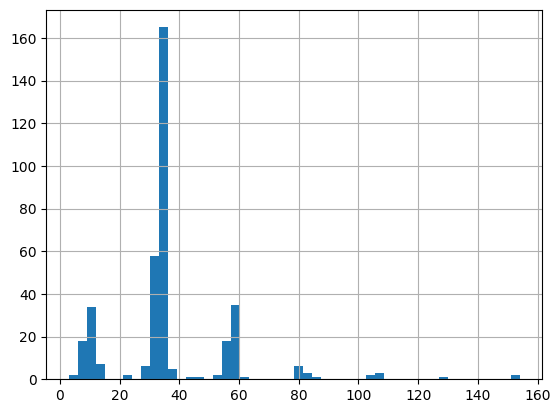

In [10]:
ports.Hours.hist(bins=50)

In [11]:
voyages = df[df.Port == "Sea"]

## Voyages
Distribution of length of voyage between ports, in hours

<Axes: >

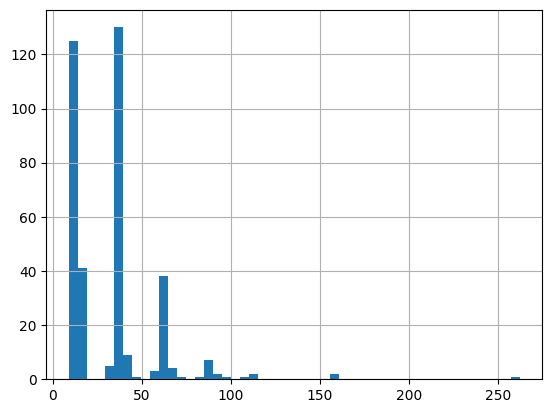

In [12]:
voyages.Hours.hist(bins=50)

Move Date to index, and truncate country names so printout fits on portrait-mode PDF

In [13]:
ports = ports.set_index("Date")

In [14]:
ports.Country = ports.Country.str[:15]

## Long port stays
Ports sorted in descending order by length of visit. 6 days == 144 hours

In [15]:
print(ports.sort_values("Hours", ascending=False).to_string())

               Day                         Port          Country  Time  Hours
Date                                                                         
2025-10-26     Sat                    Singapore        Singapore   8.0  154.0
2024-10-29     Mon                     Shanghai            China   8.0  153.0
2024-10-11     Wed            Tianjin (Beijing)            China   9.0  128.0
2024-02-09     Tue                 Barranquilla         Colombia   8.0  106.0
2026-02-17     Sat                    Cape Town     South Africa   8.0  106.0
2024-08-25     Thu                        Tokyo            Japan   8.0  106.0
2025-10-07     Sat                      Bangkok         Thailand   8.0  105.0
2025-06-09     Fri                         Bali        Indonesia   8.0  105.0
2026-06-01   Thurs             Le Havre (Paris)           France   8.0   86.0
2025-11-05     Sat    Port Klang (Kuala Lumpur)         Malaysia   8.0   82.0
2025-09-02     Fri             Haiphong (Hanoi)          Vietnam

## Ports in chronological order

In [39]:
print(ports.to_string())

               Day                         Port          Country  Time  Hours
Date                                                                         
2023-11-05     Sun                    Barcelona            Spain  12.0    8.0
2023-11-16     Fri                        Miami              USA  18.0   22.0
2023-11-20    Tues                     San Juan      Puerto Rico  18.0   23.0
2023-11-24     Fri                Port of Spain  Trinidad & Toba   8.0    9.0
2023-11-26     Sun                   Goergetown           Guyana   8.0    9.0
2023-11-27     Mon                   Paramaribo         Suriname   8.0   10.0
2023-11-30     Thu                       Macapa           Brazil   8.0   10.0
2023-12-03     Sun                    Parantins           Brazil   8.0    9.0
2023-12-05    Tues                       Manaus           Brazil   8.0    9.0
2023-12-09     Sat                        Belem           Brazil   8.0   10.0
2023-12-11     Tue                    Sao Louis           Brazil

## Voyages by length
Sorry I don't conveniently list where it goes from and to. But you can figure that out by looking for the departure date above. E.g. the longest voyage starts 2023-11-05 and takes 11 days from Barcelona to Miami. The other two long ones are to and from Hawaii.

In [18]:
print(voyages.sort_values("Hours", ascending=False).head(300).to_string())

           Date    Day Port Country  Time  Hours
2    2023-11-05    Thu  Sea     Sea  20.0  262.0
162  2024-06-07    Fri  Sea     Sea  18.0  158.0
172  2024-06-24    Mon  Sea     Sea  18.0  158.0
559  2026-02-26   Tues  Sea     Sea  18.0  114.0
200  2024-08-08   Tues  Sea     Sea  18.0  111.0
561  2026-03-05   Tues  Sea     Sea  18.0  110.0
516  2025-12-06    Wed  Sea     Sea  17.0   96.0
56   2024-01-19    Tue  Sea     Sea  16.0   94.0
0    2023-11-01    Sun  Sea     Sea  16.0   92.0
358  2025-04-05    Wed  Sea     Sea  18.0   89.0
350  2025-03-17    Fri  Sea     Sea  18.0   88.0
18   2023-12-05    Sat  Sea     Sea  17.0   87.0
370  2025-04-25   Tues  Sea     Sea  17.0   87.0
314  2025-02-02    Thu  Sea     Sea  18.0   86.0
348  2025-03-11    Sat  Sea     Sea  18.0   86.0
527  2025-12-28    Thu  Sea     Sea  18.0   86.0
198  2024-08-04    Thu  Sea     Sea  20.0   84.0
4    2023-11-17    Mon  Sea     Sea  16.0   74.0
244  2024-10-19   Tues  Sea     Sea  17.0   68.0
376  2025-05-07    S